In [ ]:
conda install -c conda-forge imbalanced-learn 

done
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.3.5=pyhd3eb1b0_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/osx-64::anaconda-project==0.11.1=py39hecd8cb5_0
  - defaults/osx-64::jupyterlab==3.4.4=py39hecd8cb5_0
  - defaults/osx-64::datashader==0.14.1=py39hecd8cb5_0
  - defaults/osx-64::anaconda==2022.10=py39_0
  - defaults/osx-64::hvplot==0.8.0=py39hecd8cb5_0
  - defaults/osx-64::bkcharts==0.2=py39hecd8cb5_1
  - defaults/osx-64::conda-build==3.22.0=py39hecd8cb5_0
  - defaults/osx-64::sphinx==5.0.2=py39hecd8cb5_0
  - defaults/osx-64::_ipyw_jlab_nb_ext_conf==0.1.0=py39hecd8cb5_1
  - defaults/noarch::conda-verify==3.4.2=py_1
  - defaults/osx-64::statsmodels==0.13.2=py39hca72f7f_0
  - defaults/osx-64::dask==2022.7.0=py39hecd8cb5_0
  - defaults/osx-64::jupyter_server==1.18.1

In [2]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'imblearn'

In [186]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [187]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [188]:
airline_tweets = pd.read_csv('Airline-Sentiment-2-w-AA.csv', encoding='ISO-8859-1')

In [189]:
airline_tweets.head()

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  681448150    False   finalized                   3      2/25/15 5:24   
1  681448153    False   finalized                   3      2/25/15 1:53   
2  681448156    False   finalized                   3     2/25/15 10:01   
3  681448158    False   finalized                   3      2/25/15 3:05   
4  681448159    False   finalized                   3      2/25/15 5:50   

  airline_sentiment  airline_sentiment:confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativereason:confidence         airline airline_sentiment_gold  \
0                        NaN  Virgin America                    NaN   
1                     0.0000  Virgin America                    NaN   
2                        NaN  Virgin America                    NaN   
3                     0.7033  Virgin America                    NaN   
4                     1.0000  Virgin America                    NaN   

         name negativereason_gold  retweet_count  \
0     cairdin                 NaN              0   
1    jnardino                 NaN              0   
2  yvonnalynn                 NaN              0   
3    jnardino                 NaN              0   
4    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

   tweet_created      tweet_id tweet_location               user_timezone  
0  2/24/15 11:35  5.703060e+17            NaN  Eastern Time (US & Canada)  
1  2/24/15 11:15  5.703010e+17            NaN  Pacific Time (US & Canada)  
2  2/24/15 11:15  5.703010e+17      Lets Play  Central Time (US & Canada)  
3  2/24/15 11:15  5.703010e+17            NaN  Pacific Time (US & Canada)  
4  2/24/15 11:14  5.703010e+17            NaN  Pacific Time (US & Canada)

In [190]:
airline_tweets.tail()

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
14635  681679794    False   finalized                   3     2/25/15 19:46   
14636  681679795    False   finalized                   3     2/25/15 19:14   
14637  681679796    False   finalized                   3     2/25/15 19:04   
14638  681679797    False   finalized                   3     2/25/15 18:59   
14639  681679798    False   finalized                   3     2/25/15 19:06   

      airline_sentiment  airline_sentiment:confidence          negativereason  \
14635          positive                        0.3487                     NaN   
14636          negative                        1.0000  Customer Service Issue   
14637           neutral                        1.0000                     NaN   
14638          negative                        1.0000  Customer Service Issue   
14639           neutral                        0.6771                     NaN   

       negativereason:confidence   airline airline_sentiment_gold  \
14635                     0.0000  American                    NaN   
14636                     1.0000  American                    NaN   
14637                        NaN  American                    NaN   
14638                     0.6659  American                    NaN   
14639                     0.0000  American                    NaN   

                  name negativereason_gold  retweet_count  \
14635  KristenReenders                 NaN              0   
14636         itsropes                 NaN              0   
14637         sanyabun                 NaN              0   
14638       SraJackson                 NaN              0   
14639        daviddtwu                 NaN              0   

                                                    text tweet_coord  \
14635  @AmericanAir thank you we got on a different f...         NaN   
14636  @AmericanAir leaving over 20 minutes Late Flig...         NaN   
14637  @AmericanAir Please bring American Airlines to...         NaN   
14638  @AmericanAir you have my money, you change my ...         NaN   
14639  @AmericanAir we have 8 ppl so we need 2 know h...         NaN   

       tweet_created      tweet_id tweet_location               user_timezone  
14635  2/22/15 12:01  5.695880e+17            NaN                         NaN  
14636  2/22/15 11:59  5.695870e+17          Texas                         NaN  
14637  2/22/15 11:59  5.695870e+17  Nigeria,lagos                         NaN  
14638  2/22/15 11:59  5.695870e+17     New Jersey  Eastern Time (US & Canada)  
14639  2/22/15 11:58  5.695870e+17     dallas, TX                         NaN

In [191]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

8.0
6.0


In [192]:
airline_tweets.isnull().sum()

_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [193]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

<AxesSubplot:>

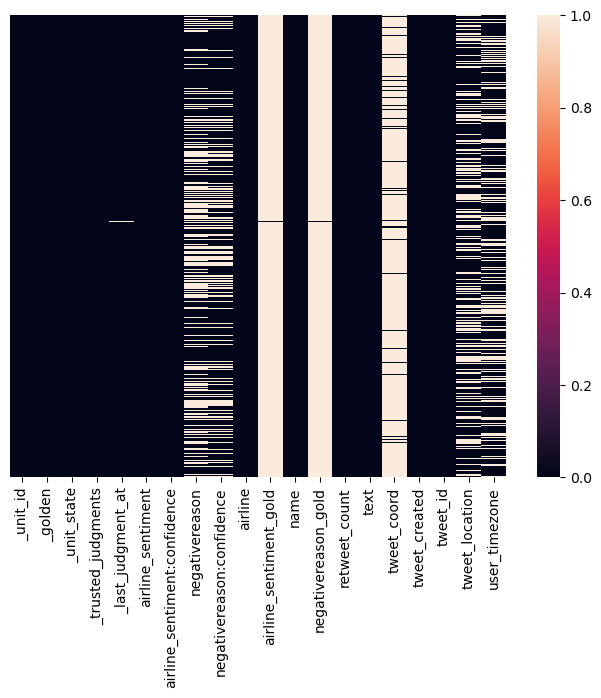

In [194]:
sns.heatmap(airline_tweets.isnull(), yticklabels=False)

In [195]:
list(airline_tweets.columns.values)

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'airline_sentiment',
 'airline_sentiment:confidence',
 'negativereason',
 'negativereason:confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_id',
 'tweet_location',
 'user_timezone']

In [196]:
airline_tweets = pd.DataFrame(airline_tweets)

In [197]:
airline_tweets = airline_tweets.drop(['negativereason','negativereason:confidence','airline_sentiment_gold','negativereason_gold','tweet_coord'], axis=1)

In [198]:
airline_tweets

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      681448150    False   finalized                   3      2/25/15 5:24   
1      681448153    False   finalized                   3      2/25/15 1:53   
2      681448156    False   finalized                   3     2/25/15 10:01   
3      681448158    False   finalized                   3      2/25/15 3:05   
4      681448159    False   finalized                   3      2/25/15 5:50   
...          ...      ...         ...                 ...               ...   
14635  681679794    False   finalized                   3     2/25/15 19:46   
14636  681679795    False   finalized                   3     2/25/15 19:14   
14637  681679796    False   finalized                   3     2/25/15 19:04   
14638  681679797    False   finalized                   3     2/25/15 18:59   
14639  681679798    False   finalized                   3     2/25/15 19:06   

      airline_sentiment  airline_sentiment:confidence         airline  \
0               neutral                        1.0000  Virgin America   
1              positive                        0.3486  Virgin America   
2               neutral                        0.6837  Virgin America   
3              negative                        1.0000  Virgin America   
4              negative                        1.0000  Virgin America   
...                 ...                           ...             ...   
14635          positive                        0.3487        American   
14636          negative                        1.0000        American   
14637           neutral                        1.0000        American   
14638          negative                        1.0000        American   
14639           neutral                        0.6771        American   

                  name  retweet_count  \
0              cairdin              0   
1             jnardino              0   
2           yvonnalynn              0   
3             jnardino              0   
4             jnardino              0   
...                ...            ...   
14635  KristenReenders              0   
14636         itsropes              0   
14637         sanyabun              0   
14638       SraJackson              0   
14639        daviddtwu              0   

                                                    text  tweet_created  \
0                    @VirginAmerica What @dhepburn said.  2/24/15 11:35   
1      @VirginAmerica plus you've added commercials t...  2/24/15 11:15   
2      @VirginAmerica I didn't today... Must mean I n...  2/24/15 11:15   
3      @VirginAmerica it's really aggressive to blast...  2/24/15 11:15   
4      @VirginAmerica and it's a really big bad thing...  2/24/15 11:14   
...                                                  ...            ...   
14635  @AmericanAir thank you we got on a different f...  2/22/15 12:01   
14636  @AmericanAir leaving over 20 minutes Late Flig...  2/22/15 11:59   
14637  @AmericanAir Please bring American Airlines to...  2/22/15 11:59   
14638  @AmericanAir you have my money, you change my ...  2/22/15 11:59   
14639  @AmericanAir we have 8 ppl so we need 2 know h...  2/22/15 11:58   

           tweet_id tweet_location               user_timezone  
0      5.703060e+17            NaN  Eastern Time (US & Canada)  
1      5.703010e+17            NaN  Pacific Time (US & Canada)  
2      5.703010e+17      Lets Play  Central Time (US & Canada)  
3      5.703010e+17            NaN  Pacific Time (US & Canada)  
4      5.703010e+17            NaN  Pacific Time (US & Canada)  
...             ...            ...                         ...  
14635  5.695880e+17            NaN                         NaN  
14636  5.695870e+17          Texas                         NaN  
14637  5.695870e+17  Nigeria,lagos                         NaN  
14638  5.695870e+17     New Jersey  Eastern Time (US & Canada)  
14639  5.695870e+17     dallas, TX                         NaN  

[14640 

In [199]:
list(airline_tweets.columns.values)

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'airline_sentiment',
 'airline_sentiment:confidence',
 'airline',
 'name',
 'retweet_count',
 'text',
 'tweet_created',
 'tweet_id',
 'tweet_location',
 'user_timezone']

In [200]:
airline_tweets.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14635    False
14636    False
14637    False
14638    False
14639    False
Length: 14640, dtype: bool

In [201]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/srikanthkv/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/srikanthkv/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/srikanthkv/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/srikanthkv/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/srikanthkv/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    |

True

In [203]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

airline_tweets['text'] = airline_tweets['text'].apply(preprocess_text)
airline_tweets

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      681448150    False   finalized                   3      2/25/15 5:24   
1      681448153    False   finalized                   3      2/25/15 1:53   
2      681448156    False   finalized                   3     2/25/15 10:01   
3      681448158    False   finalized                   3      2/25/15 3:05   
4      681448159    False   finalized                   3      2/25/15 5:50   
...          ...      ...         ...                 ...               ...   
14635  681679794    False   finalized                   3     2/25/15 19:46   
14636  681679795    False   finalized                   3     2/25/15 19:14   
14637  681679796    False   finalized                   3     2/25/15 19:04   
14638  681679797    False   finalized                   3     2/25/15 18:59   
14639  681679798    False   finalized                   3     2/25/15 19:06   

      airline_sentiment  airline_sentiment:confidence         airline  \
0               neutral                        1.0000  Virgin America   
1              positive                        0.3486  Virgin America   
2               neutral                        0.6837  Virgin America   
3              negative                        1.0000  Virgin America   
4              negative                        1.0000  Virgin America   
...                 ...                           ...             ...   
14635          positive                        0.3487        American   
14636          negative                        1.0000        American   
14637           neutral                        1.0000        American   
14638          negative                        1.0000        American   
14639           neutral                        0.6771        American   

                  name  retweet_count  \
0              cairdin              0   
1             jnardino              0   
2           yvonnalynn              0   
3             jnardino              0   
4             jnardino              0   
...                ...            ...   
14635  KristenReenders              0   
14636         itsropes              0   
14637         sanyabun              0   
14638       SraJackson              0   
14639        daviddtwu              0   

                                                    text  tweet_created  \
0                      @ virginamerica @ dhepburn said .  2/24/15 11:35   
1      @ virginamerica plus 've added commercial expe...  2/24/15 11:15   
2      @ virginamerica n't today ... must mean need t...  2/24/15 11:15   
3      @ virginamerica 's really aggressive blast obn...  2/24/15 11:15   
4                @ virginamerica 's really big bad thing  2/24/15 11:14   
...                                                  ...            ...   
14635  @ americanair thank got different flight chica...  2/22/15 12:01   
14636  @ americanair leaving 20 minute late flight . ...  2/22/15 11:59   
14637  @ americanair please bring american airline # ...  2/22/15 11:59   
14638  @ americanair money , change flight , n't answ...  2/22/15 11:59   
14639  @ americanair 8 ppl need 2 know many seat next...  2/22/15 11:58   

           tweet_id tweet_location               user_timezone  
0      5.703060e+17            NaN  Eastern Time (US & Canada)  
1      5.703010e+17            NaN  Pacific Time (US & Canada)  
2      5.703010e+17      Lets Play  Central Time (US & Canada)  
3      5.703010e+17            NaN  Pacific Time (US & Canada)  
4      5.703010e+17            NaN  Pacific Time (US & Canada)  
...             ...            ...                         ...  
14635  5.695880e+17            NaN                         NaN  
14636  5.695870e+17          Texas                         NaN  
14637  5.695870e+17  Nigeria,lagos                         NaN  
14638  5.695870e+17     New Jersey  Eastern Time (US & Canada)  
14639  5.695870e+17     dallas, TX                         NaN  

[14640 

In [204]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   airline                       14640 non-null  object 
 8   name                          14640 non-null  object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_created                 14640 non-null  object 
 12  tweet_id                      14640 non-null  float64
 13  t

<AxesSubplot:ylabel='count'>

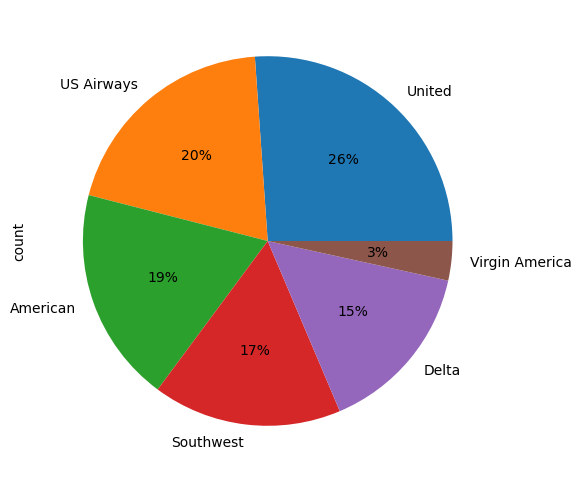

In [205]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [206]:
airline_tweets.describe()

_unit_id  _trusted_judgments  airline_sentiment:confidence  \
count  1.464000e+04        14640.000000                  14640.000000   
mean   6.814957e+08            3.618648                      0.900169   
std    8.504314e+04           11.858704                      0.162830   
min    6.814482e+08            2.000000                      0.335000   
25%    6.814536e+08            3.000000                      0.692300   
50%    6.814578e+08            3.000000                      1.000000   
75%    6.814623e+08            3.000000                      1.000000   
max    6.816798e+08          248.000000                      1.000000   

       retweet_count      tweet_id  
count   14640.000000  1.464000e+04  
mean        0.082650  5.692184e+17  
std         0.745778  7.791092e+14  
min         0.000000  5.675880e+17  
25%         0.000000  5.685590e+17  
50%         0.000000  5.694780e+17  
75%         0.000000  5.698902e+17  
max        44.000000  5.703110e+17

<AxesSubplot:ylabel='count'>

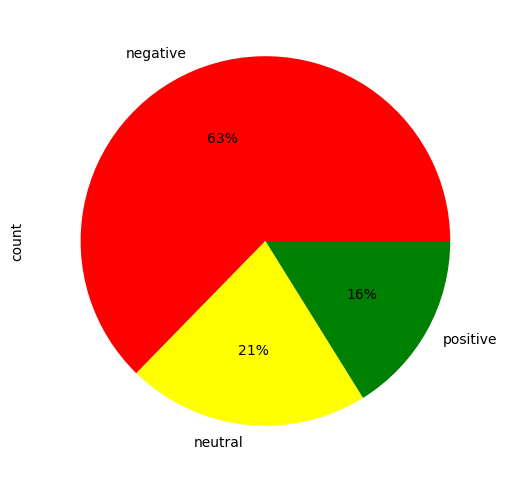

In [207]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [208]:
airline_tweets.shape

(14640, 15)

In [209]:
airline_tweets.isnull().sum()

_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                 56
airline_sentiment                  0
airline_sentiment:confidence       0
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_id                           0
tweet_location                  4733
user_timezone                   4820
dtype: int64

In [210]:
positive=airline_tweets[airline_tweets['airline_sentiment']=='positive'].text
neutral=airline_tweets[airline_tweets['airline_sentiment']=='neutral'].text
negative=airline_tweets[airline_tweets['airline_sentiment']=='negative'].text

Text(0.5, 1.0, 'Total number of tweets for each airline')

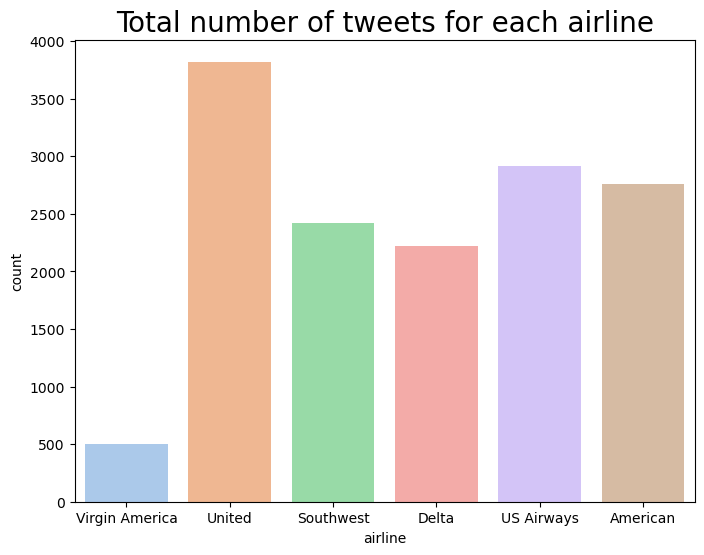

In [211]:
from wordcloud import WordCloud
import seaborn as sns

ax = sns.countplot(x = 'airline', data = airline_tweets, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)

<AxesSubplot:xlabel='airline'>

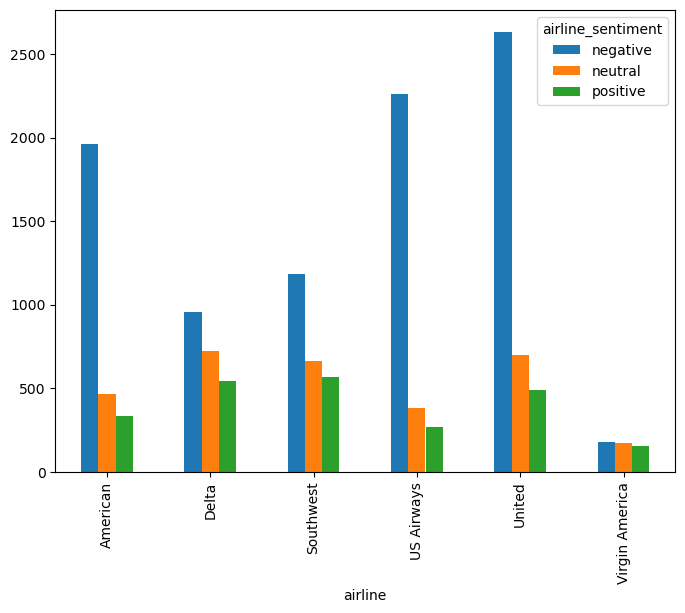

In [212]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

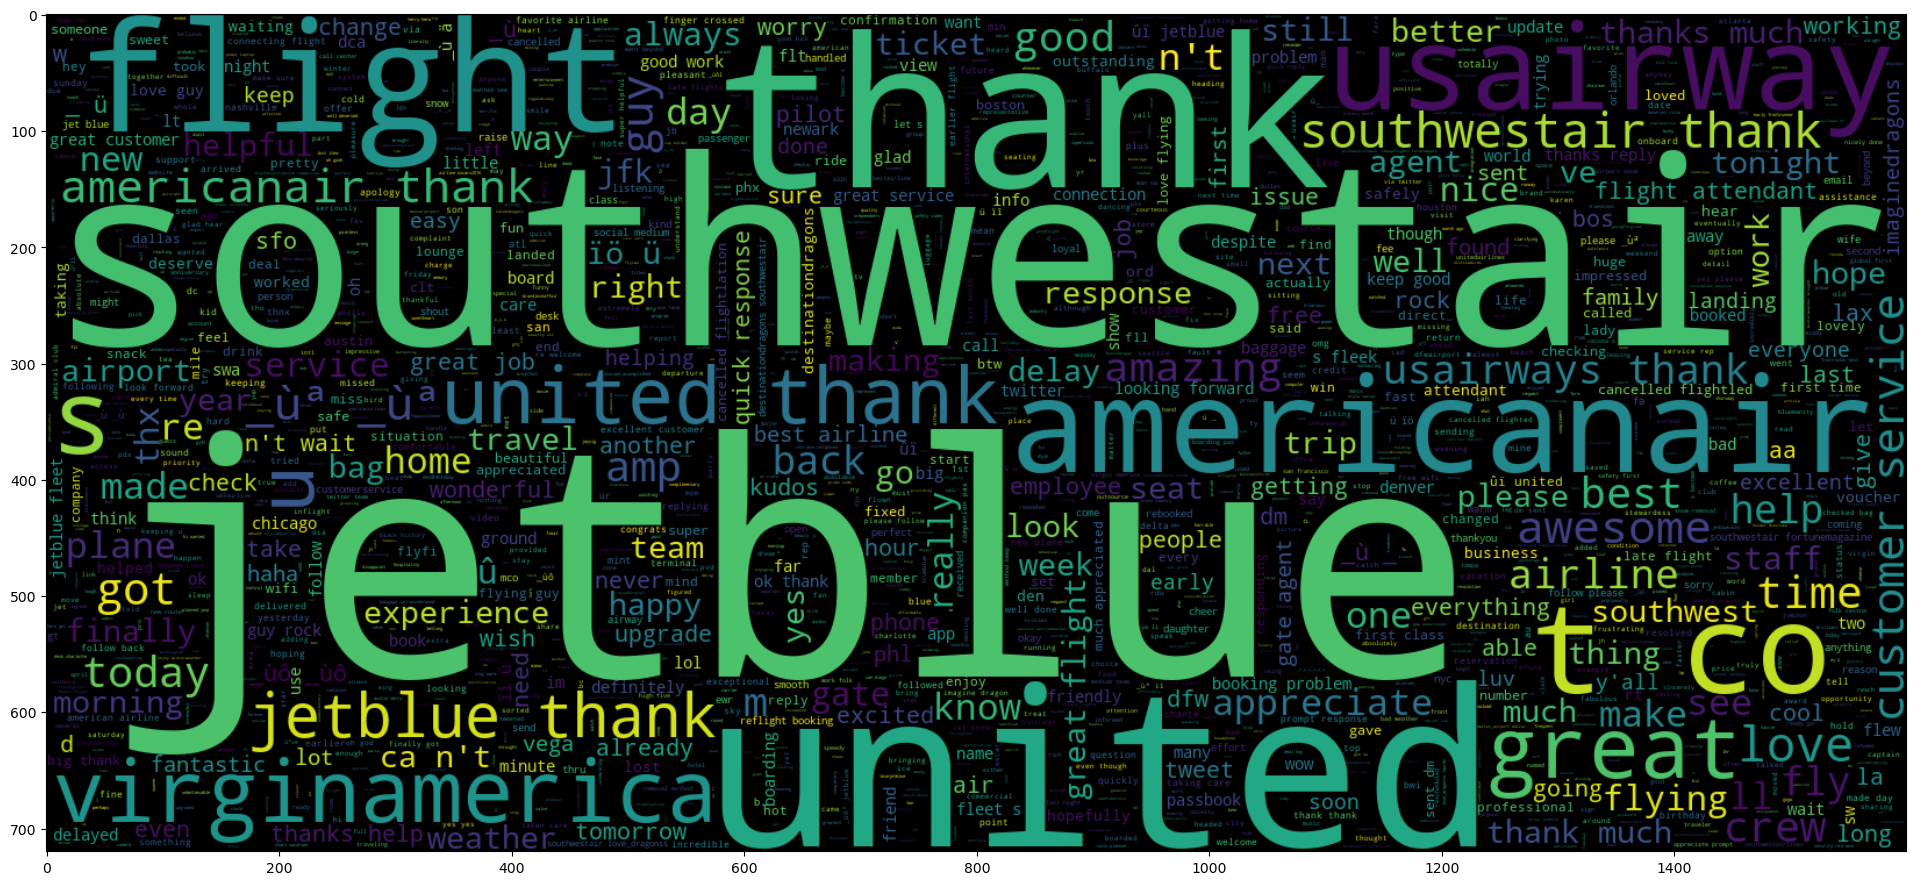

In [213]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

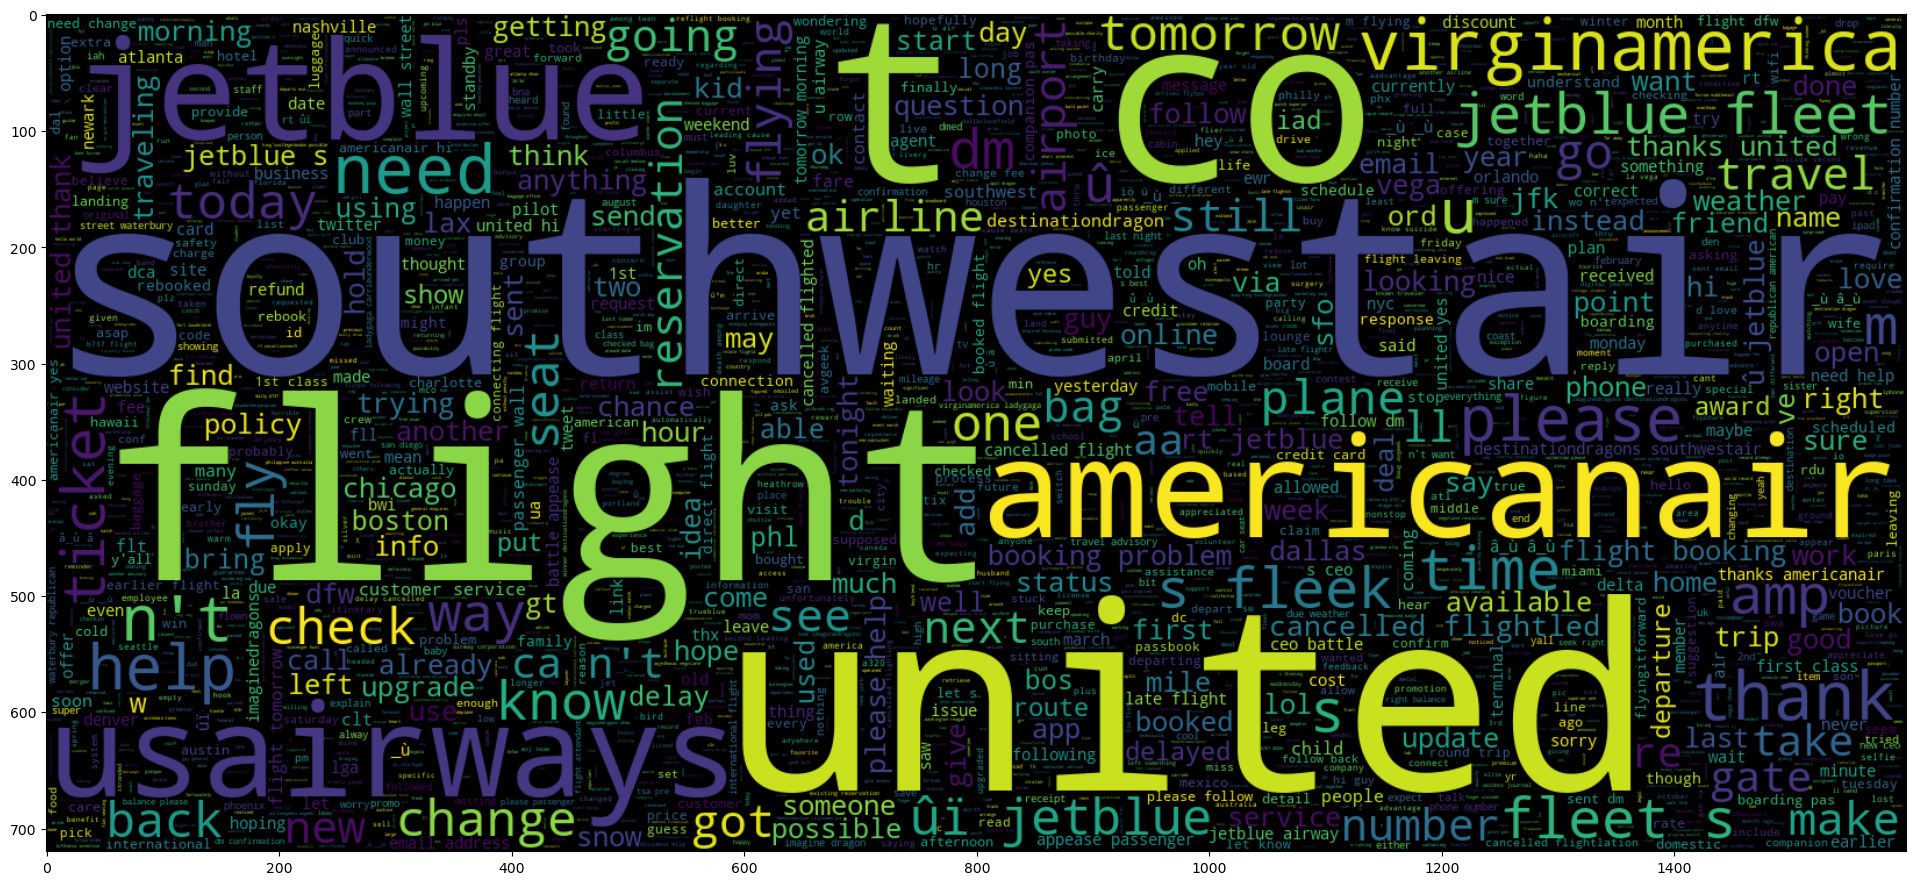

In [214]:
plt.figure(figsize=(24,12))
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')
ax.grid(False)

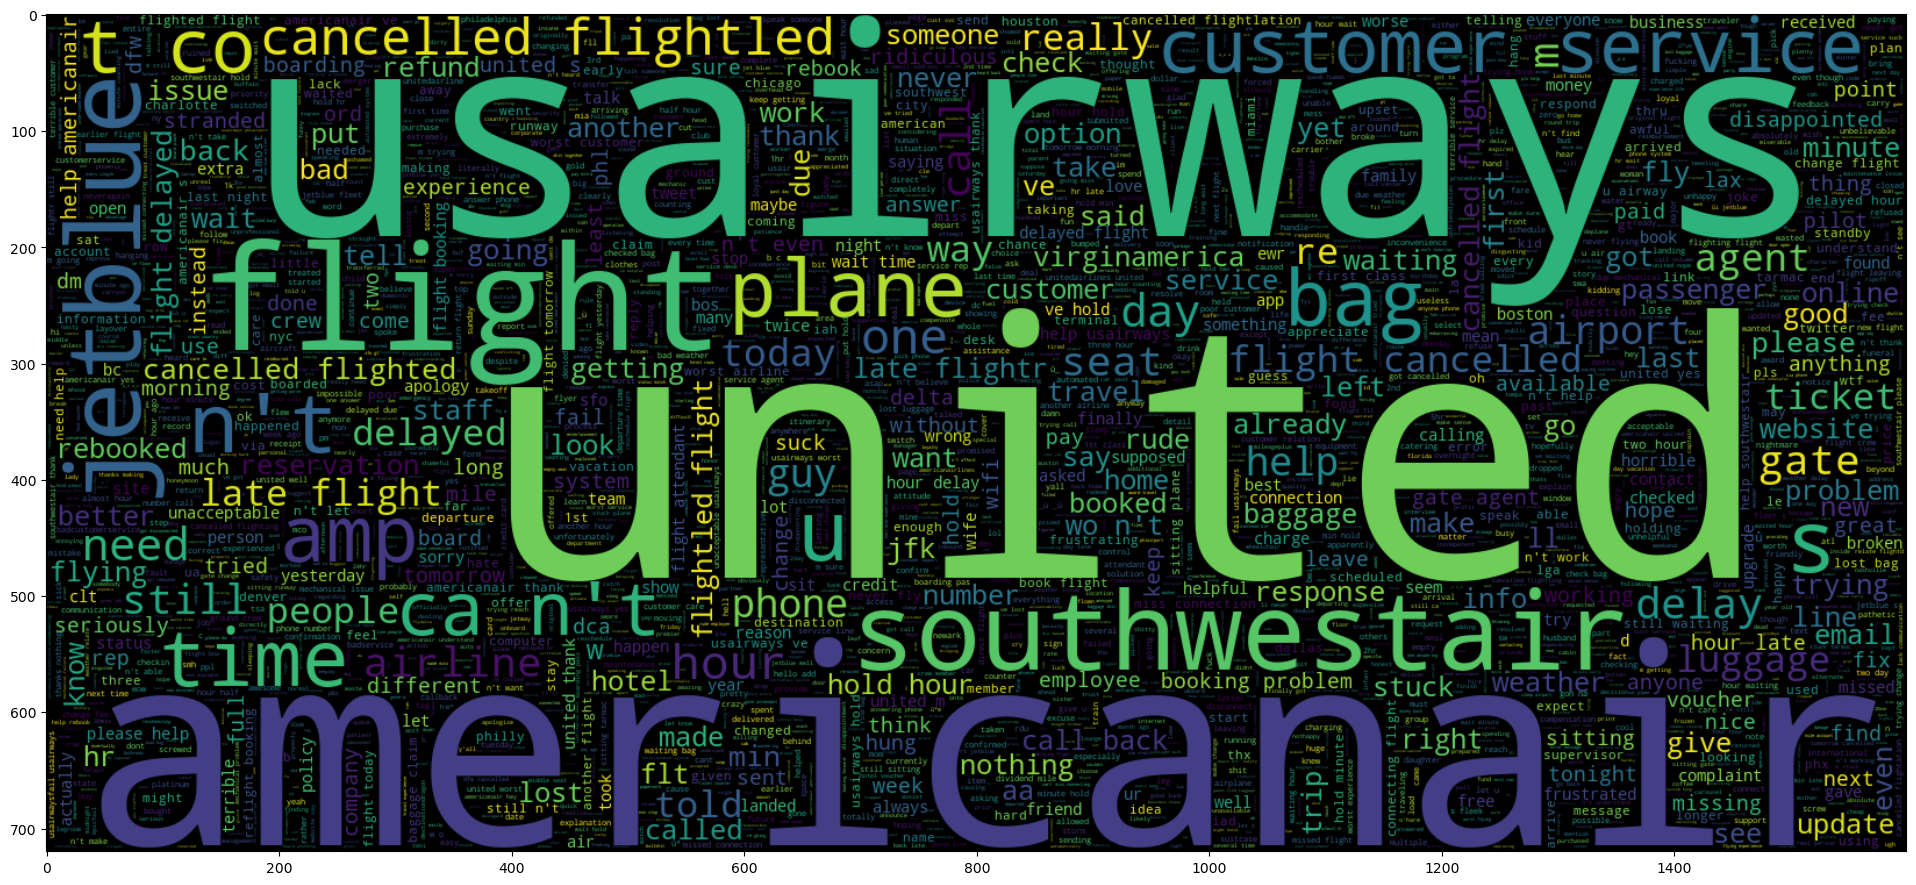

In [215]:
plt.figure(figsize = (24,12)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment:confidence'>

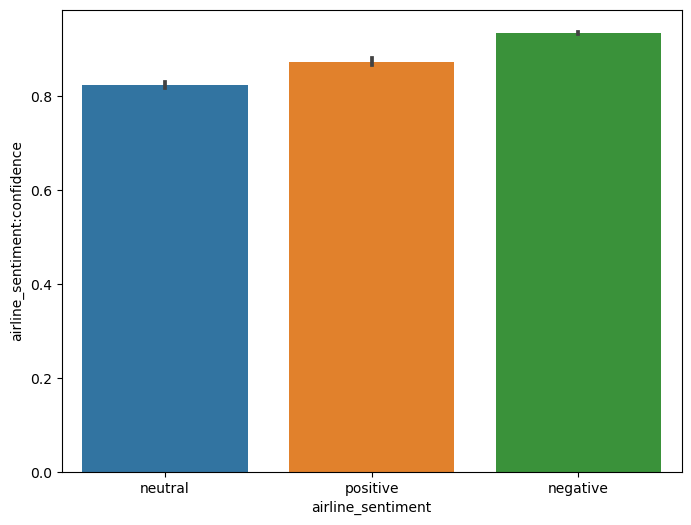

In [217]:
sns.barplot(x='airline_sentiment', y='airline_sentiment:confidence' , data=airline_tweets)

In [216]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [169]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [218]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [220]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [221]:
predictions = text_classifier.predict(X_test)

In [222]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[2920    3]
 [   5    0]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2923
        True       0.00      0.00      0.00         5

    accuracy                           1.00      2928
   macro avg       0.50      0.50      0.50      2928
weighted avg       1.00      1.00      1.00      2928

0.9972677595628415


In [1]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

NameError: name 'XGBClassifier' is not defined